Library

In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import cluster
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans

Creation of a synthtic dataset

In [65]:
np.random.seed(123)
X = np.random.randn(50,2)
X[0:25, 0] = X[0:25, 0] + 3
X[0:25, 1] = X[0:25, 1] - 4

Visualize this synthetic dataset

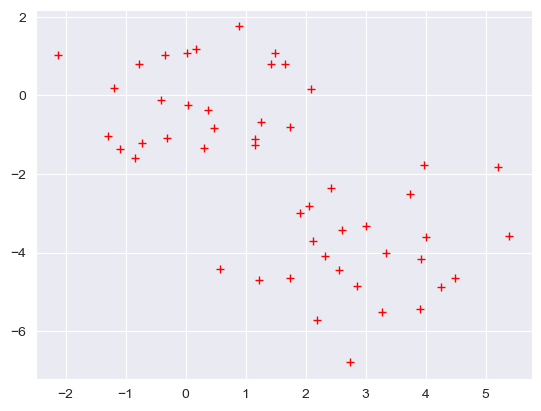

In [66]:
plt.plot(X[:,0],X[:,1],'r+')
plt.show()

K-means clustering with two clusters

Perform K-means clustering with K = 2

In [67]:
kmeans = KMeans(n_clusters=2).fit(X)

Display the centroid for each group

In [68]:
centers = kmeans.cluster_centers_
print("Centers : {}".format(centers))

Centers : [[ 0.20742071 -0.1255273 ]
 [ 3.03552977 -4.00898689]]


Plot the data:

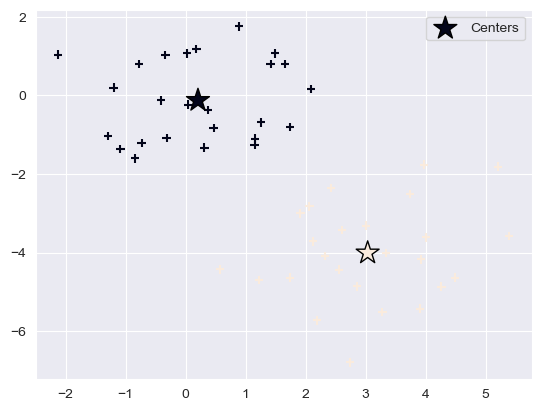

In [69]:
plt.scatter(X[:,0], X[:,1], marker='+', c=kmeans.labels_)
plt.scatter(centers[:,0], centers[:,1], edgecolors='k', s=300, marker='*', label="Centers", c=range(len(centers)))
plt.legend()
plt.show()

The cluster assignments of the 50 observations are contained in kmeans.labels_:

In [70]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


The K-means clustering perfectly separated the observations into two clusters even though we did not supply any group information to Kmeans(). Plot the data, with each observation colored according to its cluster assignment:

Text(0, 0.5, 'X1')

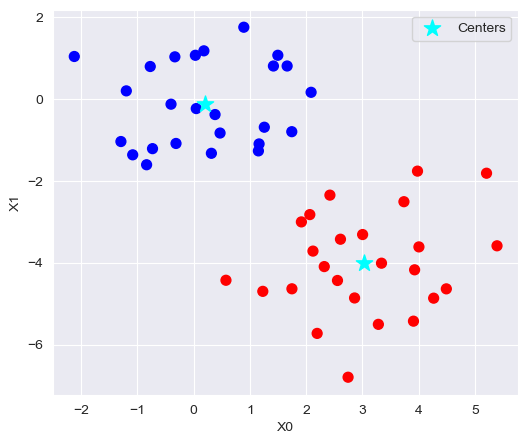

In [71]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s = 50, c = kmeans.labels_, cmap = plt.cm.bwr)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker = '*',
            s = 150,
            color = 'cyan',
            label = 'Centers')
plt.legend(loc = 'best')
plt.xlabel('X0')
plt.ylabel('X1')

Here the observations can be easily plotted because they are two-dimensional. If there were more than two variables then we could instead perform PCA and plot the first two principal components score vectors.

K-means clustering with three clusters

Text(0, 0.5, 'X1')

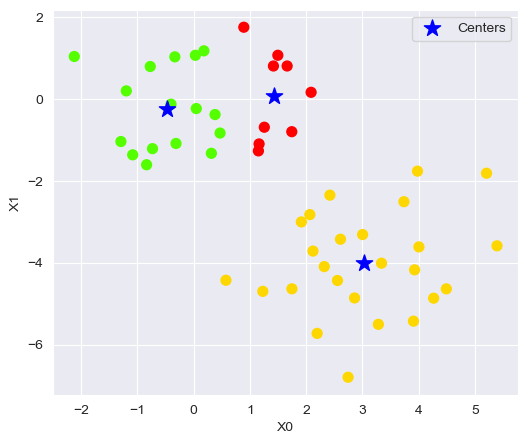

In [72]:
kmeans_3_clusters = KMeans(n_clusters = 3, random_state = 123)
kmeans_3_clusters.fit(X)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=50, c=kmeans_3_clusters.labels_, cmap=plt.cm.prism)
plt.scatter(kmeans_3_clusters.cluster_centers_[:, 0], kmeans_3_clusters.cluster_centers_[:, 1], marker='*', s=150,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

In [73]:
centers = kmeans.cluster_centers_
print("Centers : {}".format(centers))

Centers : [[ 0.20742071 -0.1255273 ]
 [ 3.03552977 -4.00898689]]


Try with multiple random initial assignments giving different values to the variable n_init. Calculate
each time the inertia_:

To run the Kmeans() function in python with multiple initial cluster assignments, we use the n_init argument (default: 10). If a value of n_init greater than one is used, then K-means clustering will be performed using multiple random assignments, and the Kmeans() function will report only the best results.

n_init = 1

In [74]:
km_out_single_run = KMeans(n_clusters = 3, n_init = 1, random_state = 123).fit(X)
km_out_single_run.inertia_

104.52330756352504

n_init = 20

In [75]:
km_out_single_run = KMeans(n_clusters = 3, n_init = 20, random_state = 123).fit(X)
km_out_single_run.inertia_

98.8339527128178

Note that .inertia_ is the total within-cluster sum of squares, which we seek to minimize by performing K-means clustering.

It is generally recommended to always run K-means clustering with a large value of n_init, such as 20 or 50 to avoid getting stuck in an undesirable local optimum.

When performing K-means clustering, in addition to using multiple initial cluster assignments, it is also important to set a random seed using the random_state parameter. This way, the initial cluster assignments can be replicated, and the K-means output will be fully reproducible.

Hierarchical clustering

Define the linkage matrix using different options : ”complete”, ”average” or ”single”.

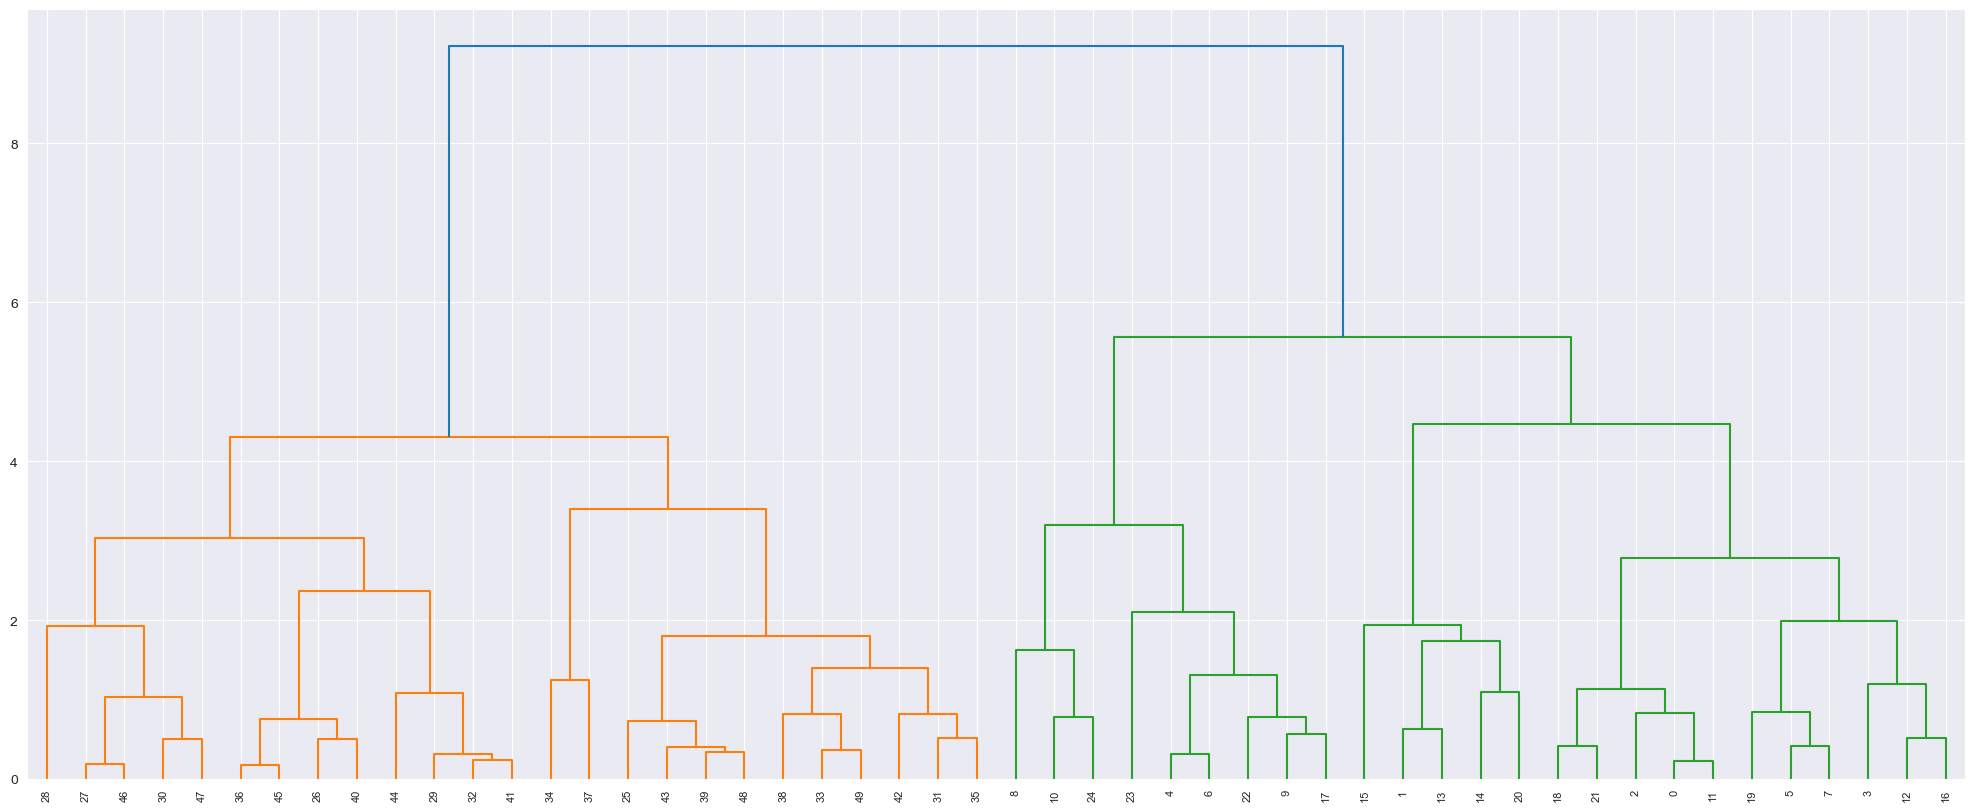

In [76]:
Z = linkage(X, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

Determine the cluster labels for each observation associated with a given cut of the dendrogram:

In [77]:
cutree = cluster.hierarchy.cut_tree(Z, n_clusters=[5, 10])
cutree[:10]

array([[0, 0],
       [1, 1],
       [0, 0],
       [0, 2],
       [2, 3],
       [0, 2],
       [2, 3],
       [0, 2],
       [2, 4],
       [2, 3]])

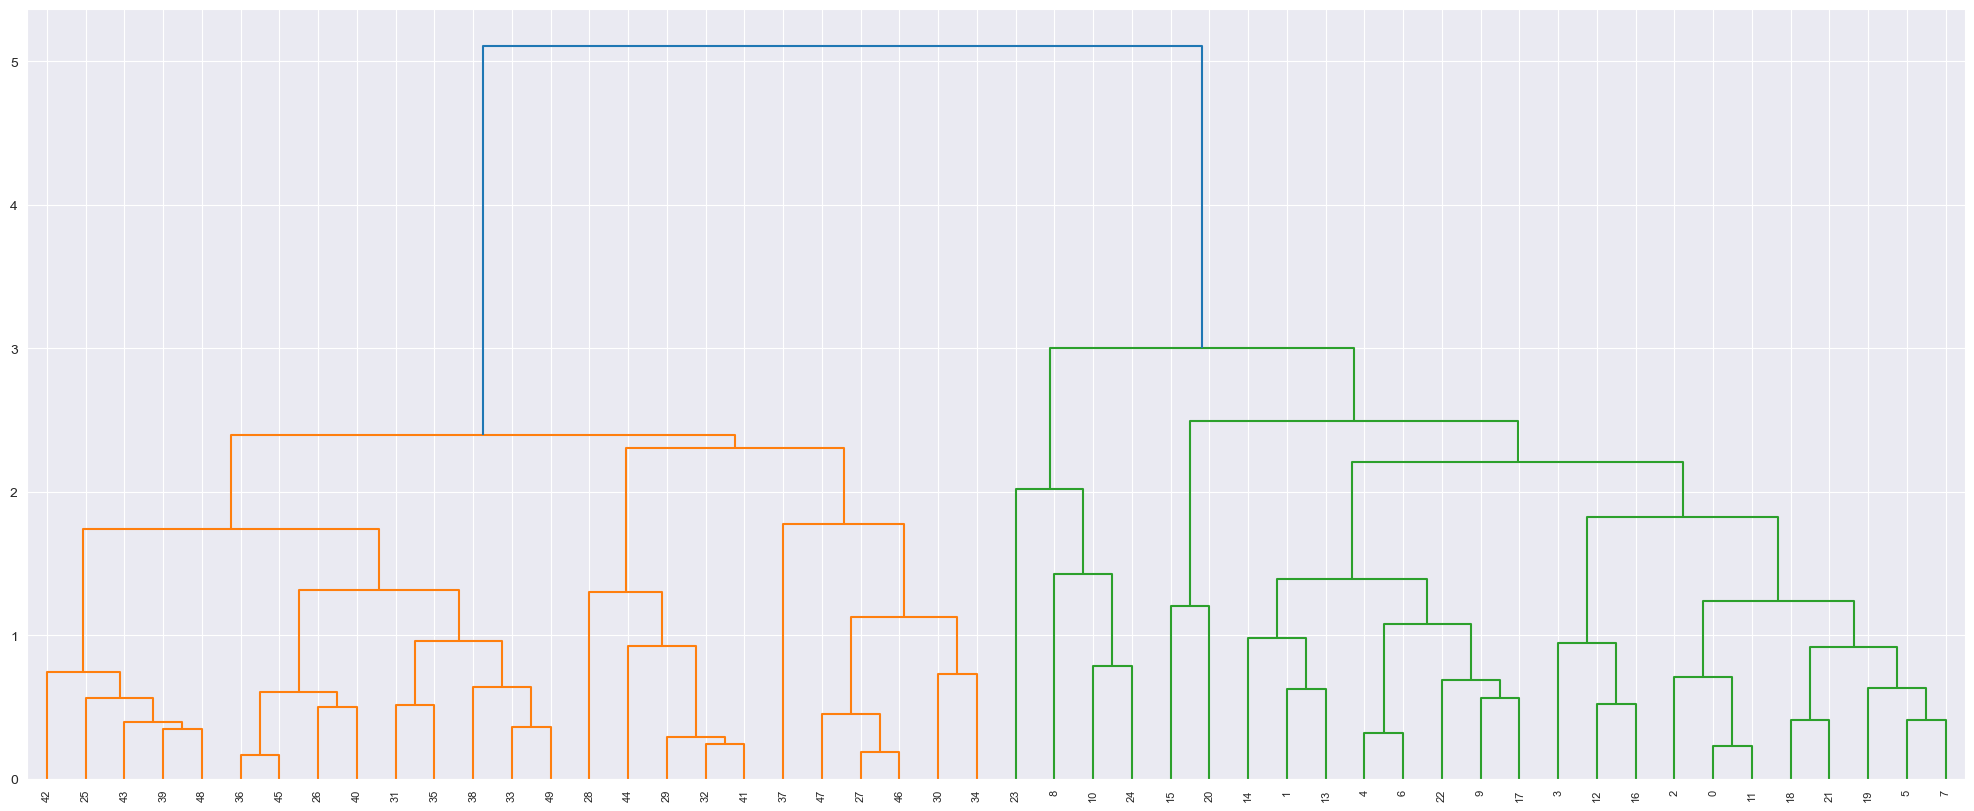

In [78]:
Z = linkage(X, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

Determine the cluster labels for each observation associated with a given cut of the dendrogram:

In [79]:
cutree = cluster.hierarchy.cut_tree(Z, n_clusters=[5, 10])
cutree[:10]

array([[0, 0],
       [0, 1],
       [0, 0],
       [0, 2],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 3],
       [0, 1]])

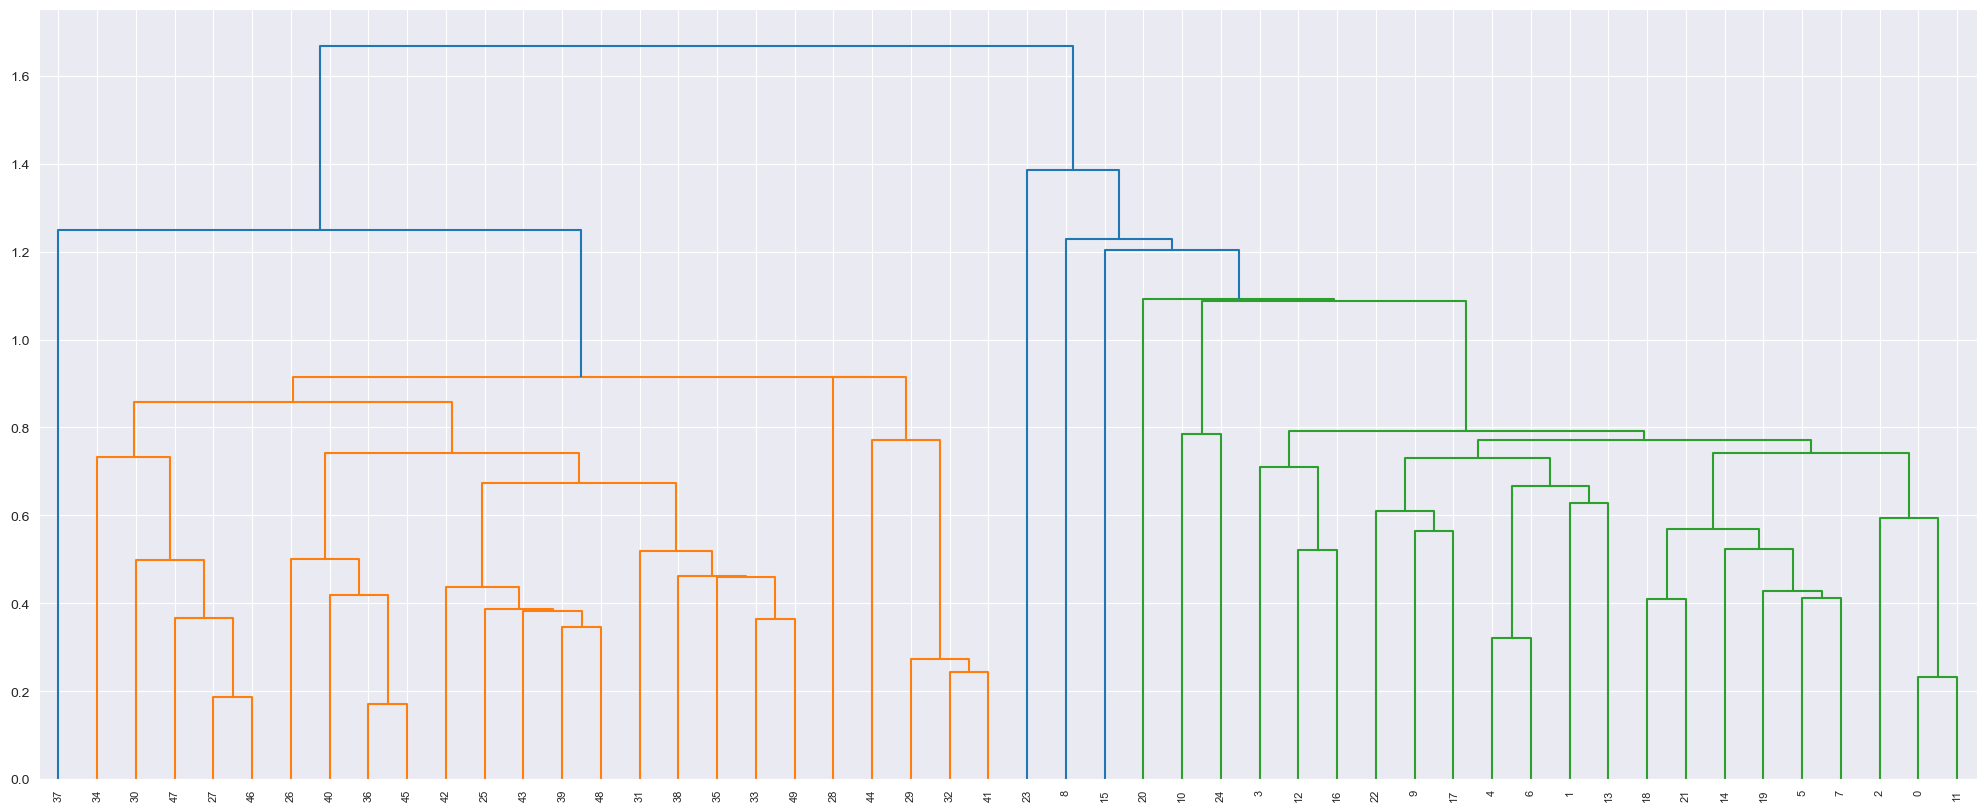

In [80]:
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

Determine the cluster labels for each observation associated with a given cut of the dendrogram:

In [81]:
cutree = cluster.hierarchy.cut_tree(Z, n_clusters=[5, 10])
cutree[:10]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0]])

Exercise 2

In this exercise we shall perform hierarchical and K-means clustering compare on the NCI60 cancer cell line mi-
croarray data, which consists of 6,830 gene expression measurements on 64 cancer cell lines. Each cell line is labeled

with a cancer type. We shall ignore the cancer types in performing clustering, as these are unsupervised techniques.
After performing clustering, we shall use this column to see the extent to which these cancer types agree with the
results of these unsupervised techniques.

Import data

In [82]:
NCI60_lab = pd.read_csv("nci60_labs.csv",index_col = 0)
NCI60_lab

,x
1,CNS
2,CNS
3,CNS
4,RENAL
5,BREAST
...,...
60,MELANOMA
61,MELANOMA
62,MELANOMA
63,MELANOMA


In [83]:
NCI60_data = pd.read_csv("nci60_data.csv",index_col = 0)
NCI60_data

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V60,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,-0.400019,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000
V61,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,-0.560020,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000
V62,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.160020,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000
V63,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,0.065019,...,0.889980,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000


Shape of the data.

In [84]:
NCI60_data.shape

(64, 6830)

Let's take a look at the cancer types for the cell lines:

In [85]:
NCI60_lab.x.value_counts(sort=True)

RENAL          9
NSCLC          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
UNKNOWN        1
K562B-repro    1
K562A-repro    1
MCF7A-repro    1
MCF7D-repro    1
Name: x, dtype: int64

In [86]:
NCI60_data.index = NCI60_lab.x
NCI60_data

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
x,,,,,,,,,,,,,,,,,,,,,
CNS,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
CNS,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
CNS,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
RENAL,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
BREAST,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MELANOMA,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,-0.400019,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000
MELANOMA,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,-0.560020,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000
MELANOMA,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.160020,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000


hierarchical clustering

Perform hierarchical clustering of the observations using complete, single, and average linkage. Use stan-
dard Euclidean distance as the dissimilarity measure

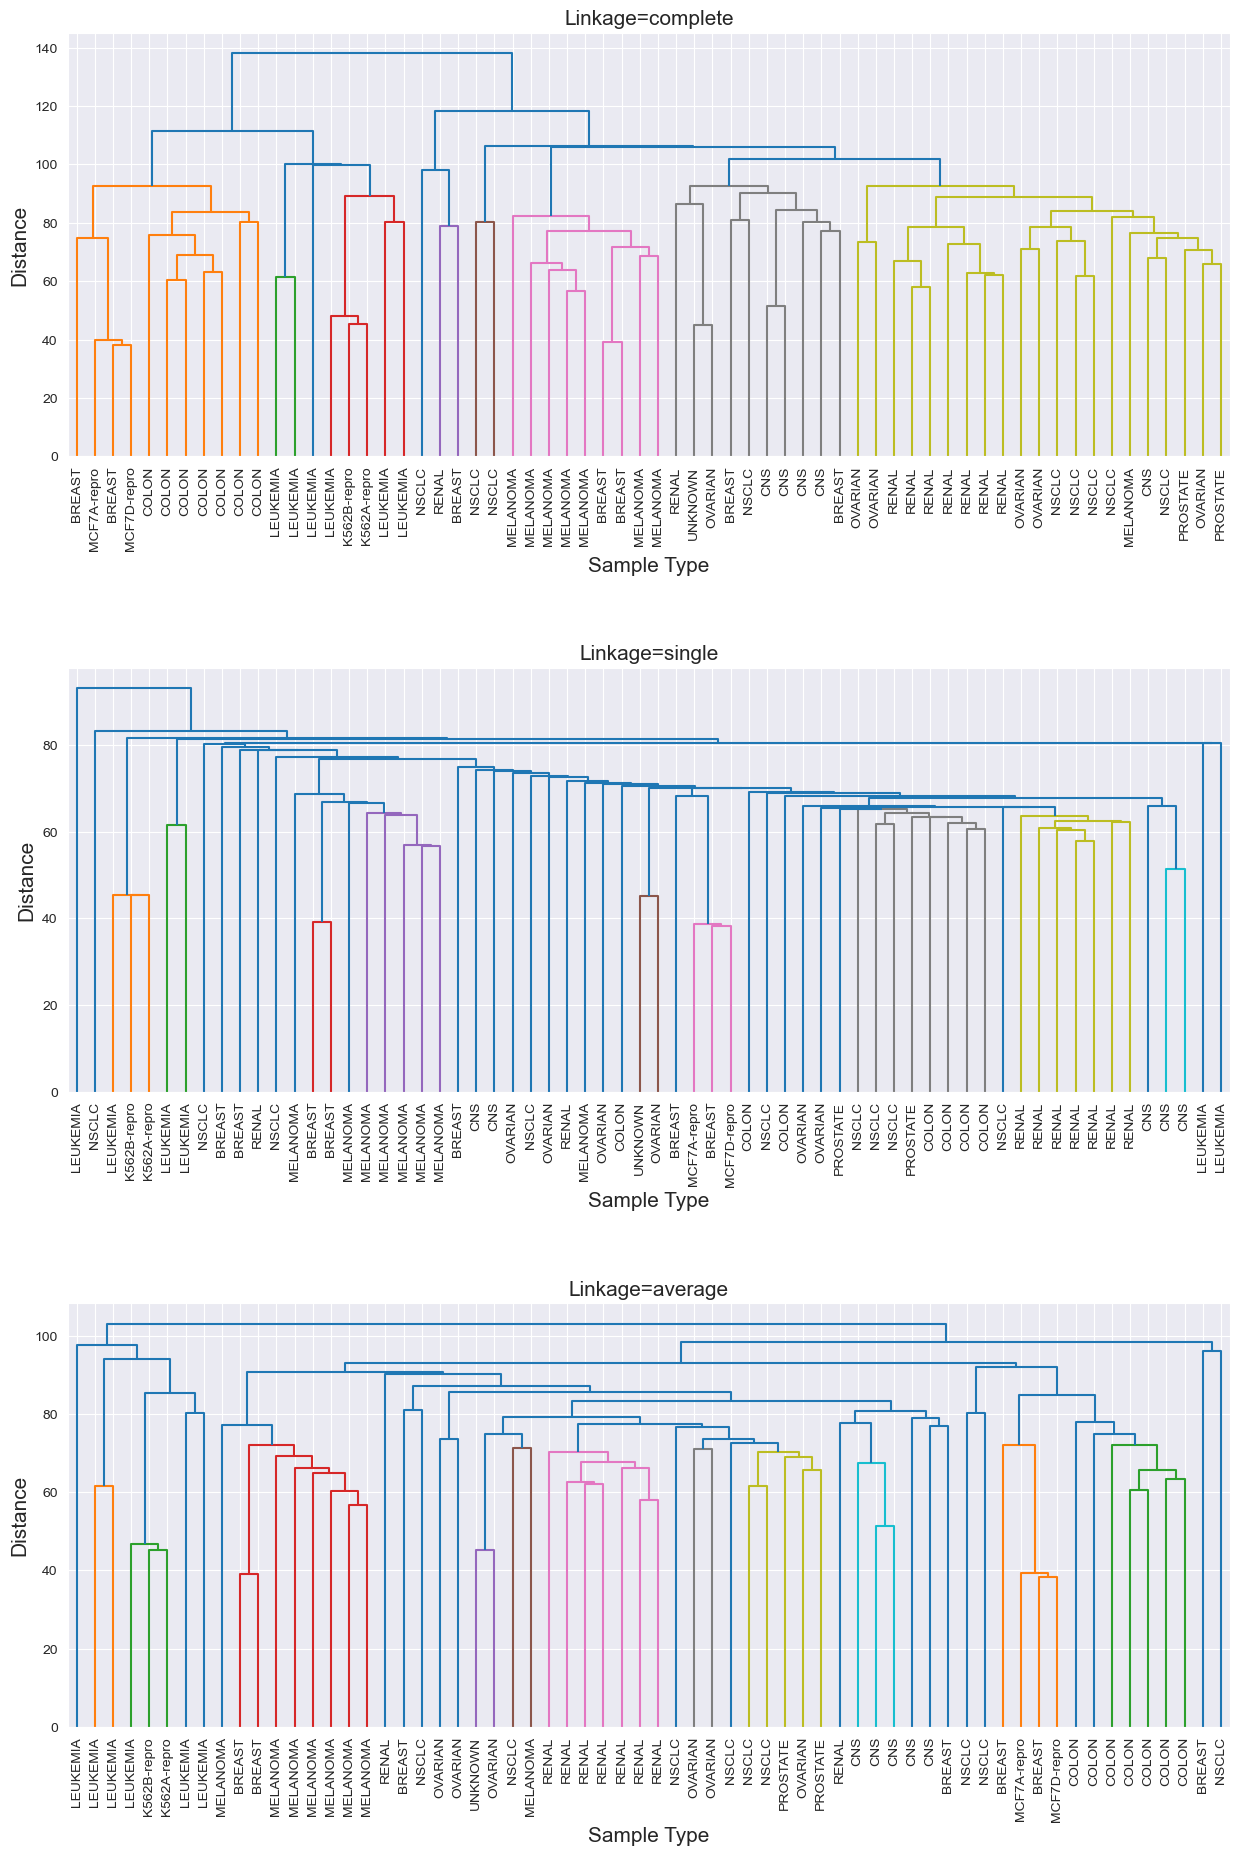

In [87]:
fig, ax = plt.subplots(3,1, figsize=(15,22))
fig.subplots_adjust(hspace=0.5)

linkages = ['complete', 'single', 'average']
for link, axis in zip(linkages, fig.axes):
    hc = linkage(y = NCI60_data, method=link, metric='euclidean')
    axis.set_title("Linkage=%s" % link, size=15)
    axis.set_xlabel('Sample Type', size=15)
    axis.set_ylabel('Distance', size=15)
    dendrogram(hc, ax=axis, labels=NCI60_data.index, leaf_rotation=90, leaf_font_size=10)

We see that the choice of linkage certainly does affect the results obtained. Typically, single linkage will tend to yield trailing clusters: very large clusters onto which individual observations attach one-by-one. On the other hand, complete and average linkage tend to yield more balanced, attractive clusters. For this reason, complete and average linkage are generally preferred to single linkage. Clearly cell lines within a single cancer type do tend to cluster together, although the clustering is not perfect.

Cut the dendrogram at the height that will yield four clusters

In [88]:
nci_hc_complete = linkage(y = NCI60_data, method="complete", metric='euclidean')

nci_hc_complete_4_clusters = cut_tree(nci_hc_complete, n_clusters = 4) # Printing transpose just for space

pd.crosstab(index = NCI60_data.index,
            columns = nci_hc_complete_4_clusters.T[0],
            rownames = ['Cancer Type'],
            colnames = ['Cluster'])

Cluster,0,1,2,3
Cancer Type,,,,
BREAST,4,1,0,2
CNS,5,0,0,0
COLON,0,0,0,7
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,0,0,6,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,8,0,0,0


There are some clear patterns. All the leukemia cell lines fall in cluster 2, while the breast cancer cell lines are spread out over three different clusters. We can plot the cut on the dendrogram that produces these four clusters by adding an axhline(), which draws a horizontal line on top of our plot:

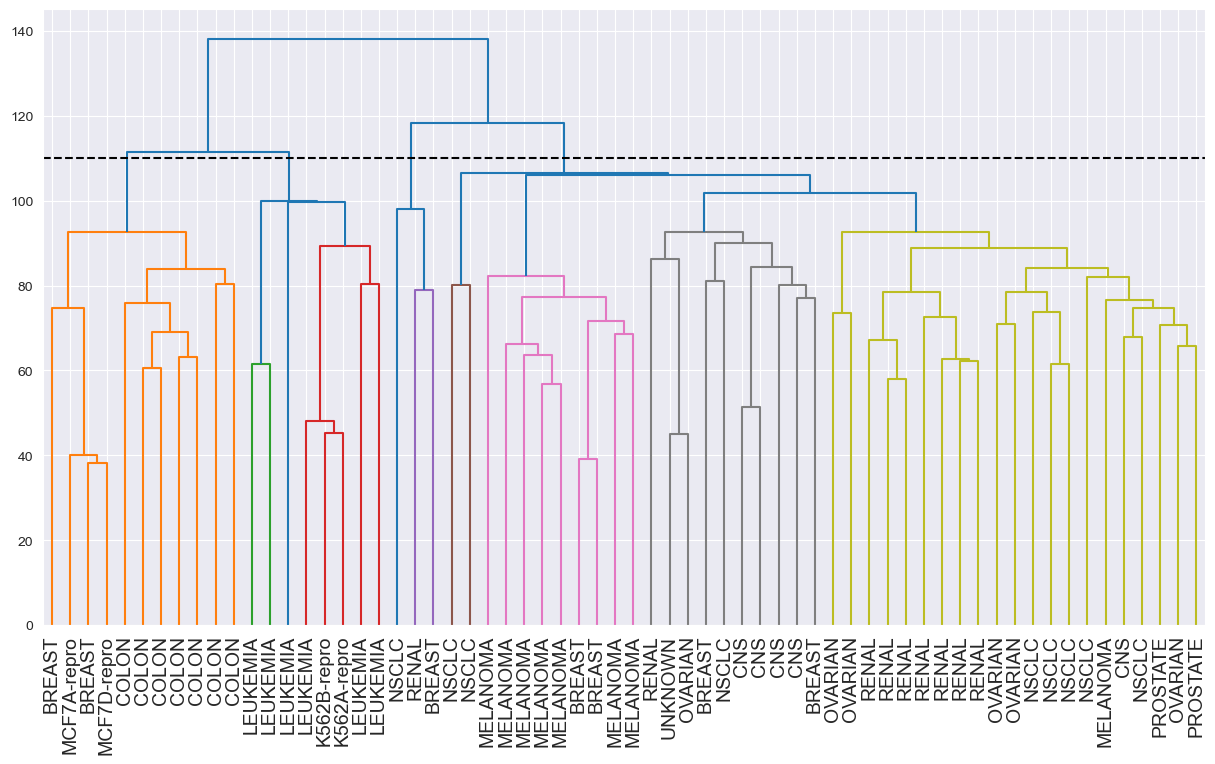

In [89]:
fig, ax = plt.subplots(1,1, figsize = (15,8))
dendrogram(nci_hc_complete,
           labels = NCI60_data.index,
           leaf_font_size = 14,
           show_leaf_counts = True)

plt.axhline(y=110, c='k', ls='dashed')
plt.show()

We claimed earlier that K-means clustering and hierarchical clustering with the dendrogram cut to obtain the same number of clusters can yield very different results. With Kmeans with k = 4:

In [90]:
kmean_4 = KMeans(n_clusters = 4, random_state = 123, n_init = 150)
kmean_4.fit(NCI60_data)
kmean_4.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Use a confusion matrix to compare the differences in how the two methods assigned observations to clusters

In [91]:
pd.crosstab(index = kmean_4.labels_,
            columns = nci_hc_complete_4_clusters.T[0],
            rownames = ['K-Means'],
            colnames = ['Hierarchical'])

Hierarchical,0,1,2,3
K-Means,,,,
0,0,0,7,0
1,9,0,0,0
2,25,3,0,0
3,8,0,1,11


We see that the four clusters obtained using hierarchical clustering and Kmeans clustering are somewhat different. Cluster 0 in K-means clustering is almost identical to cluster 2 in hierarchical clustering. However, the other clusters differ: for instance, cluster 2 in K-means clustering contains a portion of the observations assigned to cluster 0 by hierarchical clustering, as well as all of the observations assigned to cluster 1 by hierarchical clustering.